# <center>Bike Sharing Assignment</center>

A US bike-sharing provider __BoomBikes__ has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to __understand the factors affecting the demand for these shared bikes in the American market__. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Business Goal:
We are required to <mark>model the demand for shared bikes with the available independent variables.</mark> It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Setting default style for plots
plt.style.use("bmh")

Reading the dataset :  __day.csv__

In [2]:
# Reading dataset and saving as dataframe object

bikeSharingDaily = pd.read_csv("day.csv")

In [3]:
# Exploring the dataframe

bikeSharingDaily.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Let's now look at the shape of the dataset.

In [4]:
# Printing shape of dataset

bikeSharingDaily.shape

(730, 16)

Here, we have __16 columns__ in our dataset. Now, let's start with __Data Cleaning.__

# 1. DATA CLEANING

## Fixing Rows:
1. There are no header or footer rows in our dataset.
2. There is no summary rows in our dataset.

So, we don't need to fix any rows.

## Fixing Columns:

In our dataset the first column is __instant__, which tells the row number. We don't need that information.
So, we'll drop that column.

In [5]:
# Dropping "instant" column from bikeSharingDaily dataframe

bikeSharingDaily.drop('instant', axis=1, inplace=True)

In [6]:
# Checking if instant column is dropped

bikeSharingDaily.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


We can see that __yr__ column tells about whether the year is 2019 or 2018 i.e. if yr is 1 then it's 2019 else 2018.<br>
So, let's rename the column to have a meaningful name.

In [7]:
# Renaming yr column to yr_2019

bikeSharingDaily.rename({'yr': 'yr_2019'}, axis=1, inplace=True)

In [8]:
# Validating the renamed column

bikeSharingDaily.sample(5)

,dteday,season,yr_2019,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
34,04-02-2018,1,0,2,0,5,1,2,8.663464,11.42935,58.5217,8.565213,88,1620,1708
352,19-12-2018,4,0,12,0,1,1,1,11.343347,14.04665,63.7500,11.584032,260,3143,3403
355,22-12-2018,1,0,12,0,4,1,2,17.356653,21.30605,75.7500,3.167425,227,2841,3068
369,05-01-2019,1,1,1,0,4,1,1,10.899153,13.92060,52.4167,8.709129,140,3132,3272
284,12-10-2018,4,0,10,0,3,1,3,22.276653,25.88585,90.6250,16.626050,217,2199,2416


We have now fixed the rows and columns in our dataset.
Let's now move on to handling missing values

## Treating Missing Values
Now, let's check if there are any missing values in our dataset.

In [9]:
# Printing info of bikeSharingDaily dataframe

bikeSharingDaily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr_2019     730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


We can see from the above cell output that there are <mark>__no missing values__</mark> in our dataset.<br>
So, we can now proceed with standardizing values.

## Standardizing Values

Let's look at the datatypes of different column first.

In [10]:
# Printing datatypes associated with columns

bikeSharingDaily.dtypes

dteday         object
season          int64
yr_2019         int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Now, let's look at a sample from our dataset

In [11]:
# Printing sample of data

bikeSharingDaily.sample(5)

,dteday,season,yr_2019,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
168,18-06-2018,2,0,6,0,6,0,1,28.563347,32.19770,67.0417,8.000336,1807,3312,5119
380,16-01-2019,1,1,1,1,1,0,1,7.790000,9.53315,52.2500,15.500986,217,2081,2298
550,05-07-2019,3,1,7,0,4,1,1,33.927500,38.06835,45.7917,12.999943,1405,4836,6241
386,22-01-2019,1,1,1,0,0,0,2,6.662500,8.11250,79.6250,13.375746,196,1781,1977
634,27-09-2019,4,1,9,0,4,1,2,26.650000,30.39875,69.0833,9.000914,751,6642,7393


We can see from the above output that we need to handle the columns with numbers which are overly precised i.e. the following columns :
1. temp
2. atemp
3. hum
4. windspeed

We will round these overprecised numbers to two decimal places.

In [12]:
# Rounding overprecised columns

overPrecised = ['temp','atemp','hum','windspeed']

bikeSharingDaily[overPrecised] = bikeSharingDaily[overPrecised].apply(lambda x : round(x,2), axis=1)

In [13]:
# Checking if columns have rounded to decimal places

bikeSharingDaily.sample(5)

,dteday,season,yr_2019,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
98,09-04-2018,2,0,4,0,6,0,2,14.04,17.08,87.75,8.92,879,1576,2455
591,15-08-2019,3,1,8,0,3,1,1,28.97,32.70,61.96,11.37,1198,6149,7347
655,18-10-2019,4,1,10,0,4,1,2,21.42,25.63,72.83,15.87,1008,6501,7509
122,03-05-2018,2,0,5,0,2,1,2,25.28,29.10,69.71,22.96,603,3848,4451
353,20-12-2018,4,0,12,0,2,1,2,15.82,19.82,59.54,4.13,216,3534,3750


Now, let's check if there are outliers in our dataset.

For this, we will first describe the dataset. We will only describe the columns which are non-categorical.

In [14]:
# Describing statistics about the dataframe

nonCategorical = ['temp','atemp','hum','windspeed','casual','registered','cnt']

bikeSharingDaily[nonCategorical].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319329,23.726384,62.765082,12.763699,849.249315,3658.757534,4508.006849
std,7.506827,8.150247,14.237634,5.195640,686.479875,1559.758728,1936.011647
min,2.420000,3.950000,0.000000,1.500000,2.000000,20.000000,22.000000
25%,13.810000,16.892500,52.000000,9.040000,316.250000,2502.250000,3169.750000
50%,20.465000,24.370000,62.625000,12.130000,717.000000,3664.500000,4548.500000
75%,26.882500,30.445000,72.990000,15.627500,1096.500000,4783.250000,5966.000000
max,35.330000,42.040000,97.250000,34.000000,3410.000000,6946.000000,8714.000000


We can see in the above description that there are some outliers. Let's plot boxplots to visualize them better.

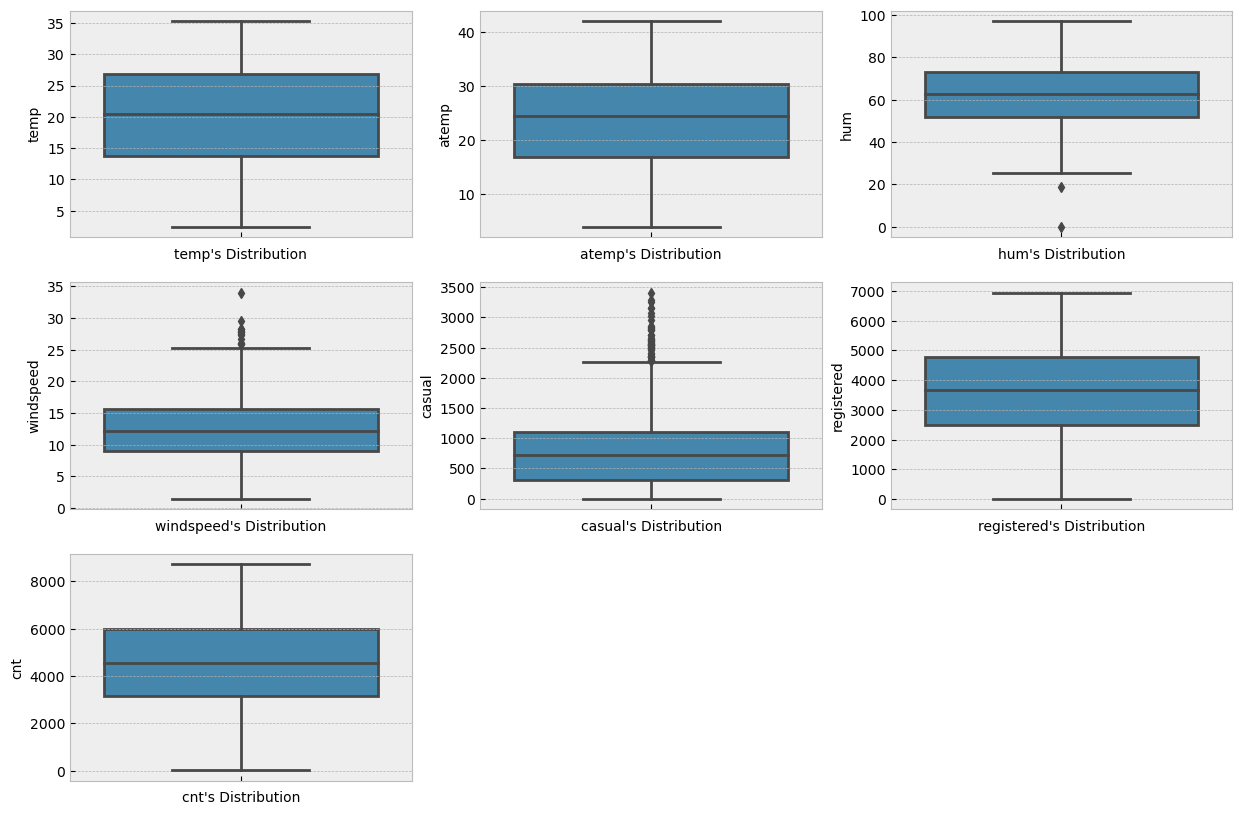

In [15]:
# Plotting boxplots for all the 7 non-categorical columns

plt.figure(figsize=(15,10))
for i in range(len(nonCategorical)):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=nonCategorical[i], data=bikeSharingDaily)
    plt.xlabel(nonCategorical[i]+"'s Distribution")

We can see from the above plots that __hum, windspeed and casual__ columns have outliers. So, we should handle them.

As we know, outliers can affect the analysis a lot. Moreover, Linear Regression is very sensitive to outliers. So, we will remove the rows containing outlier values based on the following conditions:
- __hum__ (humidity) values below 20
- __windspeed__ values above 25.7
- __casual__ (casual users count) values above 2250

In [16]:
# Removing outliers from the dataset

bikeSharingDaily = bikeSharingDaily[(bikeSharingDaily.hum >= 20)
                                    & (bikeSharingDaily.windspeed <= 25.7) & (bikeSharingDaily.casual <= 2250)]

Now, we have removed the outliers. We can now proceed with this data.

As we have now standardized all the columns. We can now move on start fixing invalid values.

## Fixing Invalid Values

Let's check the datatype of all the columns of the dataframe.

In [17]:
# Printing datatype of columns

bikeSharingDaily.dtypes

dteday         object
season          int64
yr_2019         int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Here, all the columns except the __dteday__ column is having incorrect data type.<br>
We'll convert __dteday__ to datetime format.

In [18]:
# Converting dteday to datetime 

bikeSharingDaily['dteday'] = bikeSharingDaily['dteday'].astype('datetime64')

In [19]:
# Checking if dteday is converted to datetime

bikeSharingDaily.dtypes

dteday        datetime64[ns]
season                 int64
yr_2019                int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

We can see in the above cell output that we have converted the __dteday__ to datetime.<br>
Now, let's proceed with validating internal rules.

As we know that, <mark>__working day and holiday can't be occuring simultaneously.__</mark> So, we will validate this rule for our dataset.<br>

In [20]:
# Determining rows having workingday and holiday as 1 simultaneously

bikeSharingDaily[(bikeSharingDaily.holiday==1) & (bikeSharingDaily.workingday==1)]

,dteday,season,yr_2019,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


We can see from the above output that, none of the rows in our dataset are violating the rule defiened above.

Now, we have handled the invalid values. Let's now proceed with Filtering Data.

##  Filtering Data

We'll start by identifying rows which are having duplicate values.

In [21]:
# Identifying duplicates excluding the dteday column as we have data based on different dates

bikeSharingDaily.iloc[:,1:].duplicated().sum()

0

So, there are no duplicated rows. Now, let's check what columns are not relevant to our analysis.

In [22]:
# Printing columns of the dataframe

bikeSharingDaily.columns

Index(['dteday', 'season', 'yr_2019', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

From the above output, we can make see that none of the columns look irrelevant to our analysis.

Hence, we will now proceed further.

With this, we have come to an end to __Data Cleaning__, we'll now start with analysis.

# 2. DATA UNDERSTANDING/ANALYSIS

We have cleaned our data and now our __bikeSharingDaily__ dataset is ready for analysis.


Our goal is to identify the __factors affecting the rental of bikes__. So, before building the model we'll perform the following :
- Numerical Columns Analysis
- Categorical Columns Analysis

### Numerical Columns Analysis

Let's plot a pairplot for all the numerical columns in the dataset.

<Figure size 1500x1000 with 0 Axes>

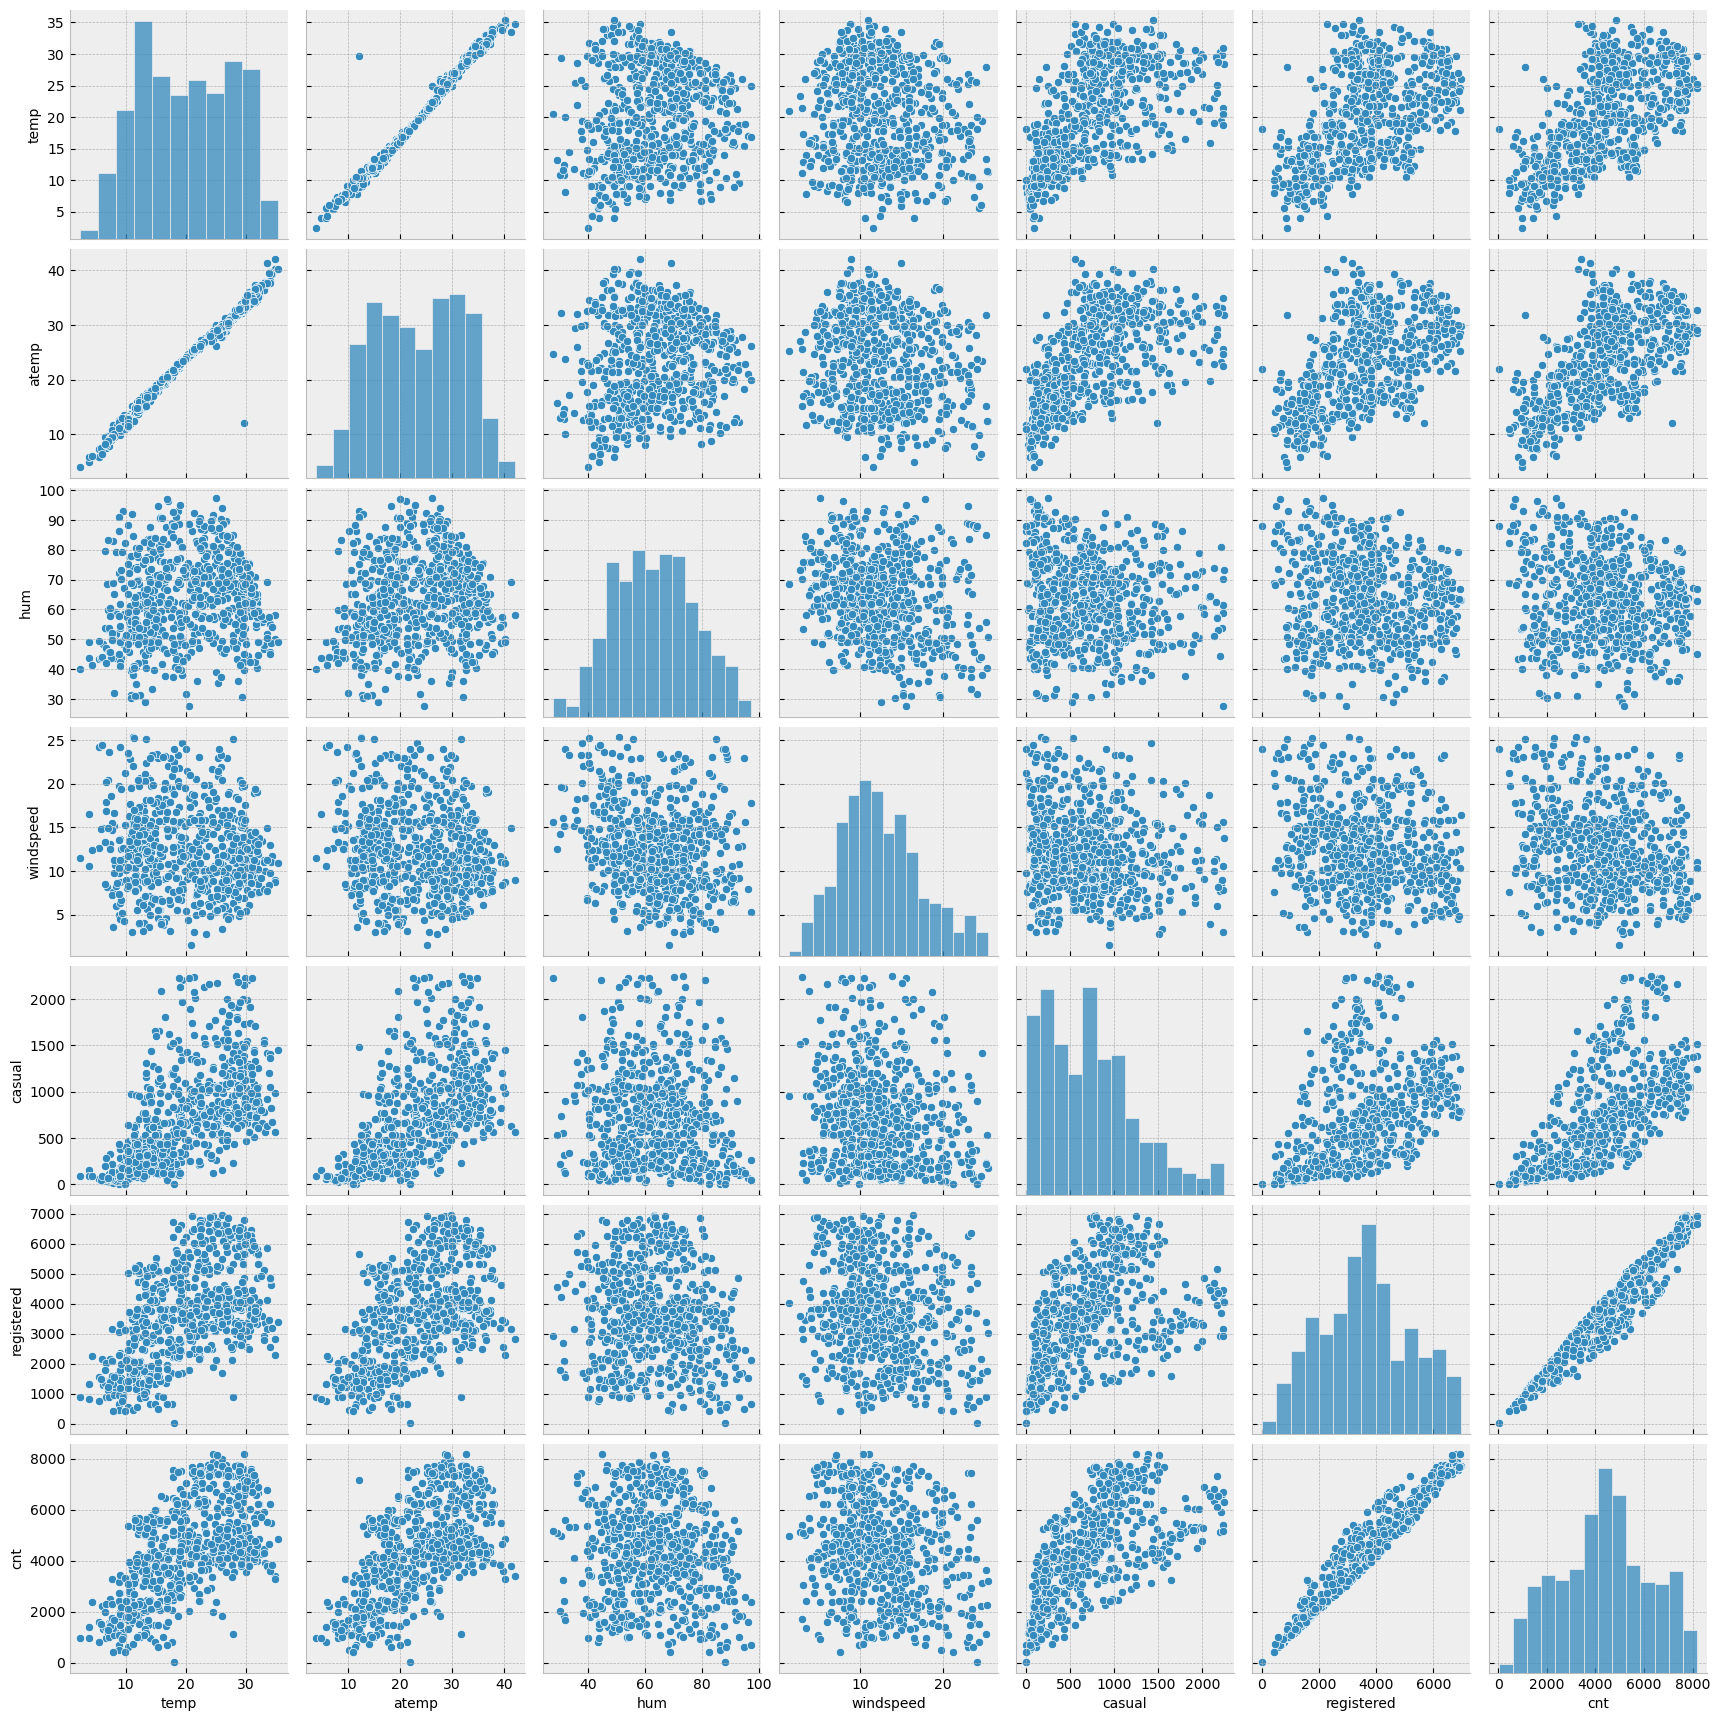

In [23]:
# using the list nonCategorical to select the numerical columns and plotting pairplot

plt.figure(figsize=(15,10))
sns.pairplot(data=bikeSharingDaily[nonCategorical])
plt.show()

From the above pairplot, we can see the some of the columns are highly correlated with each other. For confirming this, we'll plot a heatmap and check their correlation. We'll also drop the columns which are highly correlated and are redundant in nature.

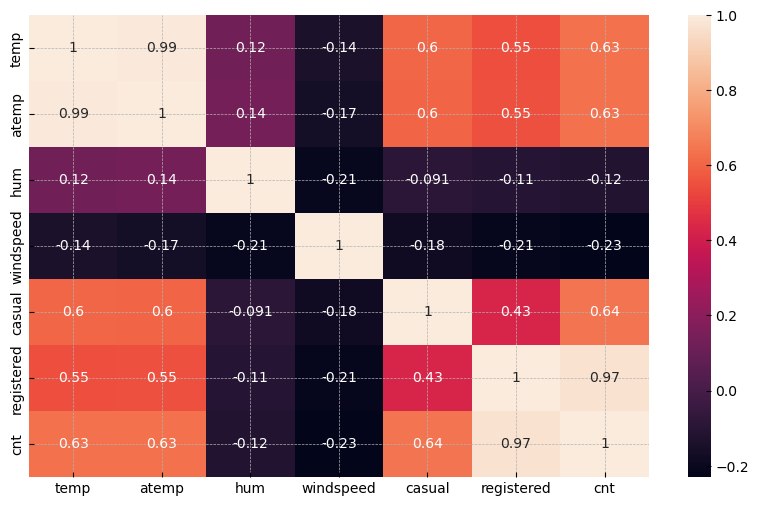

In [24]:
# Plotting heatmap for numerical columns

plt.figure(figsize=(10,6))
sns.heatmap(data=bikeSharingDaily[nonCategorical].corr(), annot=True)
plt.show()

From the heatmap above, we can observe the following:
- temp (Temperature) and atemp(Felt Temperature) are very highly correlated. Hence, one of them should be dropped.
- registered (Registered users count) and cnt (Total count) are highly correlated.
- casual (Casual users count) and cnt (Total count) are also well correlated.

Though, we know that <mark>__Total Count = Casual users count + Registered users count__</mark>.
So, let's check if this is true.

In [25]:
# Printing rows with total count not equal to sum of casual users and registered users

bikeSharingDaily[~(bikeSharingDaily.cnt == bikeSharingDaily.casual + bikeSharingDaily.registered)]

,dteday,season,yr_2019,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


We can see that the above statement is true. Hence, we will drop both __casual and registered__, as __cnt__ is our target column.

So, now we will drop the following columns from our dataframe :
- __atemp__ : Temperature (_temp_ column) will be more aligned to business, as felt temperature can't be forecasted beforehand which will be required for making business decisions. Also, _temp_ and _atemp_ are highly correlated(99%) so it won't make much difference dropping any one of them.
- __casual & registered__ : Casual and Registered count sum up to give total count. Hence, both should be dropped.

In [26]:
# Dropping atemp, casual and registered

bikeSharingDaily.drop(columns=['atemp','casual','registered'], axis=1, inplace=True)

In [27]:
# Validating dropped columns

bikeSharingDaily.sample(5)

,dteday,season,yr_2019,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
58,2018-02-28,1,0,2,0,1,1,2,16.70,87.64,19.41,1446
45,2018-02-15,1,0,2,0,2,1,1,10.91,31.43,19.52,1815
29,2018-01-30,1,0,1,0,0,0,1,8.88,72.22,4.96,1096
143,2018-05-24,2,0,5,0,2,1,2,27.06,74.08,13.88,4492
667,2019-10-30,4,1,10,0,2,1,2,13.05,82.55,14.27,1096


Now, let's analyze the categorical columns.

### Categorical Columns Analysis

So, here we'll analyze categorical columns with the help of boxplots.

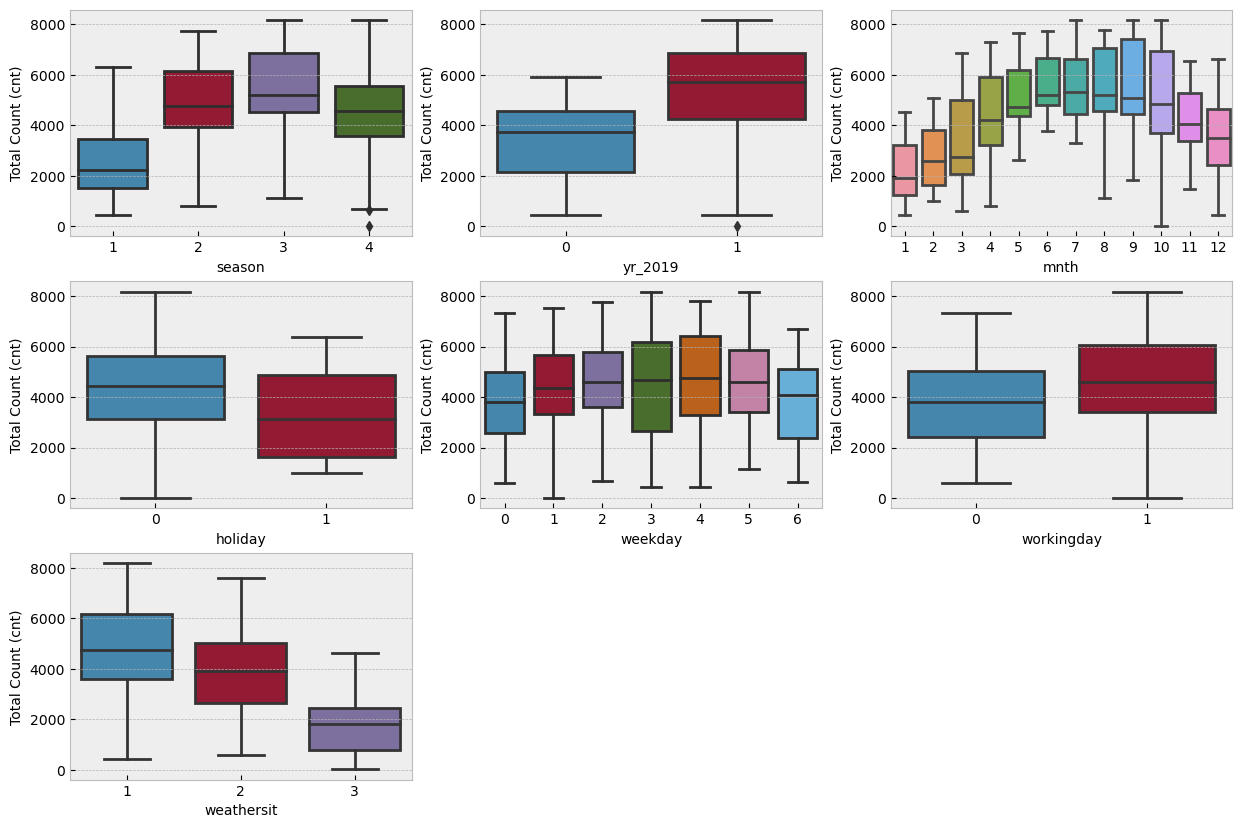

In [28]:
# Creating a list of categorical columns
categoricalCols = ['season','yr_2019','mnth','holiday','weekday','workingday','weathersit']

# Plotting boxplots for all the 7 categorical columns

plt.figure(figsize=(15,10))
for i in range(len(categoricalCols)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=categoricalCols[i], y='cnt', data=bikeSharingDaily)
    plt.xlabel(categoricalCols[i])
    plt.ylabel("Total Count (cnt)")

We can infer the following from the above boxplots:
- We can see for the seasons, __summer__ and __fall__ are having most number of bikes being rented.
- If we see the yearwise boxplot, we can see a huge growth in the __year 2019__ in comparison to the previous year.
- For months, we can see that the __holiday months are having lower number of bikes being rented__ in comparison to other months.
- In terms of weather, __Clear/Partly Cloudy__ kind of weather is having relatively high number of rented bikes.

Let's dive deeper into these categorical columns to see what more information we can get.

We will plot the following subplots :
1. Season-Year vs Total Count
2. Weather Type-Holidays vs Total Count
3. Holidays-year vs Total Count

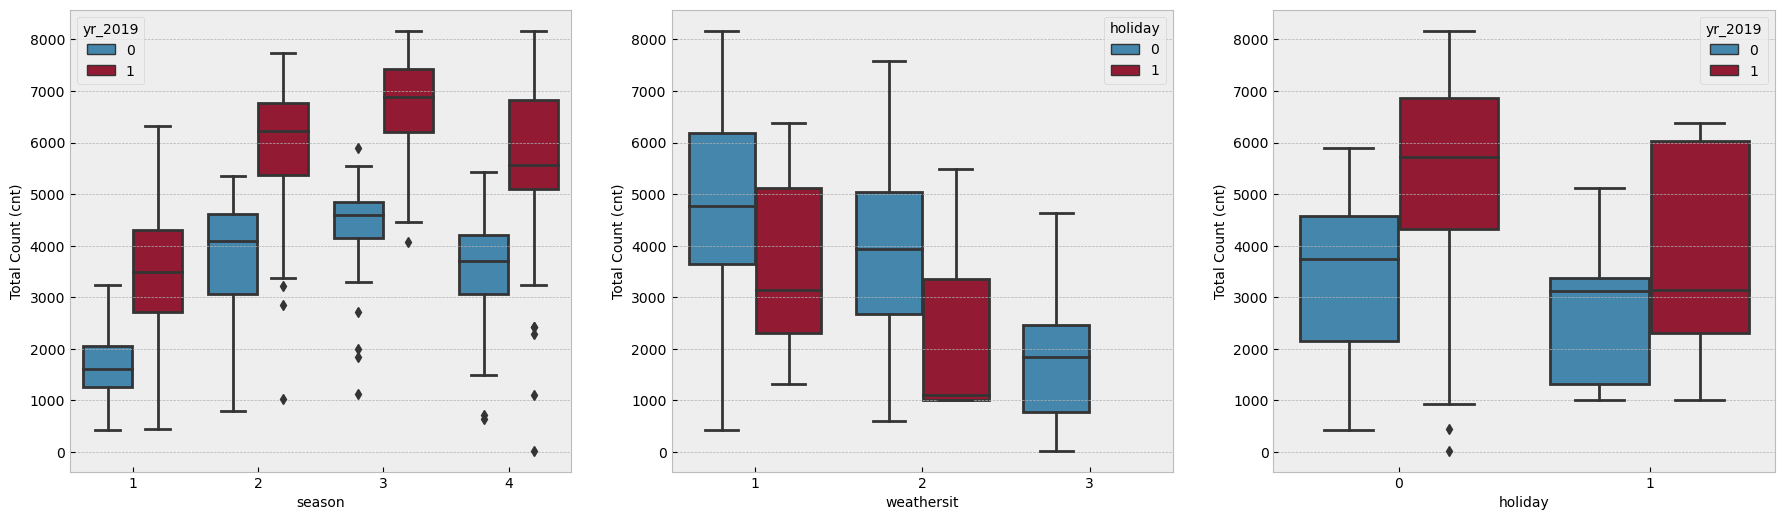

In [29]:
# Plotting box plots with multiple categorical columns

plt.figure(figsize=(22,6))

plt.subplot(1,3,1)
sns.boxplot(x='season', y='cnt', hue='yr_2019',data=bikeSharingDaily)
plt.xlabel('season')
plt.ylabel("Total Count (cnt)")

plt.subplot(1,3,2)
sns.boxplot(x='weathersit', y='cnt', hue='holiday',data=bikeSharingDaily)
plt.xlabel('weathersit')
plt.ylabel("Total Count (cnt)")

plt.subplot(1,3,3)
sns.boxplot(x='holiday', y='cnt', hue='yr_2019',data=bikeSharingDaily)
plt.xlabel('holiday')
plt.ylabel("Total Count (cnt)")

plt.show()

We can conclude from the above plots, that there are similar patterns seen for every segment of different categories.
Also, we can conclude that these could be the key factors affecting the no. of bikes being rented.

We will now start preparing our data to be inputted into the model building phase.

# 3. DATA PREPARATION

Here, we will handle categorical columns by performing following transformations:
1. Encode Categorical Columns
2. Create Dummy Variables

## Encoding Categorical Columns

First, let's look at our dataset to see where encoding should be performed.

In [30]:
# Priting dataset sample

bikeSharingDaily.sample(5)

,dteday,season,yr_2019,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
345,2018-12-12,4,0,12,0,1,1,1,9.77,67.08,4.25,3310
623,2019-09-16,3,1,9,0,0,0,1,23.78,57.00,6.04,7333
252,2018-10-09,3,0,9,0,6,0,1,27.06,75.38,10.29,5345
523,2019-08-06,2,1,6,0,5,1,1,26.62,46.79,11.75,7736
30,2018-01-31,1,0,1,0,1,1,2,7.41,60.38,12.54,1501


So, we have to encode the following columns:
1. season 
2. mnth
3. weekday
4. weathersit

#### 1. Encoding "season"
We will now encode the __season__ column with it's corresponding season names, as per the data dictionary.

In [31]:
# Mapping season values to corresponding season

bikeSharingDaily.season = bikeSharingDaily['season'].map({1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter'})

In [32]:
# Verifying if season is encoded/mapped to the corresponding season

bikeSharingDaily.season.value_counts()

fall      172
spring    170
winter    168
summer    160
Name: season, dtype: int64

Season is encoded now. Let's encode __mnth__.

#### 2. Encoding "mnth"

Encoding __mnth__ column to its corresponding month.

In [33]:
# Mapping mnth with their names using calendar
import calendar

bikeSharingDaily.mnth = bikeSharingDaily['mnth'].apply(lambda x : calendar.month_name[x])

In [34]:
# Verifying mnth mapping

bikeSharingDaily.mnth.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

Now, we will encode the __weekday__ column.

#### Encoding "weekday"

We can see in the data dictionary that there's no mapping provided for the weekday column. So, we'll derive the weekday from the __dteday__ column using datetime methods.

In [35]:
# Overwriting weekday column with the day of week extracted from dteday

bikeSharingDaily['weekday'] = bikeSharingDaily['dteday'].dt.day_name()

In [36]:
# Verifying the mapping of weekday

bikeSharingDaily.weekday.value_counts()

Thursday     102
Tuesday      101
Friday       100
Saturday      99
Wednesday     97
Monday        86
Sunday        85
Name: weekday, dtype: int64

So, we have now mapped __weekday__.

#### Encoding "weathersit"

We will now map __weathersit__ as per the mapping defined in the Data Dictionary.

In [37]:
# Mapping weathersit with corresponding weather type

bikeSharingDaily['weathersit'] = bikeSharingDaily['weathersit'].map({
                                    1 : 'Clear_PartlyCloudy',
                                    2 : 'Mist_Cloudy',
                                    3 : 'Light_Snow-Rain',
                                    4 : 'Heavy_Snow-Rain'
                                })

In [38]:
# Verifying mapping of weathersit column

bikeSharingDaily.weathersit.value_counts()

Clear_PartlyCloudy    419
Mist_Cloudy           231
Light_Snow-Rain        20
Name: weathersit, dtype: int64

So, now we have mapped __weathersit__ column. Also, we can see that this particular US region/city didn't have Heavy Rain/Snow type weather.<br>
Now we will create dummy variables, as our Linear Regression model can deal with numerical values only.

## Creating Dummy Variables

Let's look at the dataset to decide which column needs to be converted.

In [39]:
# Printing a sample of dataset
bikeSharingDaily.sample(5)

,dteday,season,yr_2019,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
66,2018-08-03,spring,0,March,0,Friday,1,Clear_PartlyCloudy,11.99,42.08,8.08,2133
477,2019-04-23,summer,1,April,0,Tuesday,1,Mist_Cloudy,13.19,76.67,20.33,3214
265,2018-09-23,winter,0,September,0,Sunday,1,Mist_Cloudy,24.98,97.25,5.25,2395
302,2018-10-30,winter,0,October,0,Tuesday,0,Clear_PartlyCloudy,13.09,62.38,11.83,3331
64,2018-06-03,spring,0,March,0,Sunday,0,Mist_Cloudy,15.44,94.83,23.00,605


We will create dummy variables for __season, mnth, weekday & weathersit__ columns

In [40]:
# Creating dummy variables using get_dummies() method of Pandas
# Concating the dummy variables to original dataframe

for col in ['season','mnth','weekday','weathersit'] :
    # Creating dummies
    dummy = pd.get_dummies(bikeSharingDaily[col], drop_first=True)
    
    # Concating dummies to the list
    bikeSharingDaily = pd.concat([bikeSharingDaily, dummy], axis=1)
    
    # Dropping the original column
    bikeSharingDaily.drop(col, axis=1, inplace=True)

In [41]:
# Verifying creation of dummy variables

bikeSharingDaily.head()

,dteday,yr_2019,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow-Rain,Mist_Cloudy
0,2018-01-01,0,0,0,14.11,80.58,10.75,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,2018-02-01,0,0,0,14.90,69.61,16.65,801,1,0,...,0,0,0,0,0,1,0,0,0,1
2,2018-03-01,0,0,1,8.05,43.73,16.64,1349,1,0,...,0,0,0,0,0,1,0,0,0,0
3,2018-04-01,0,0,1,8.20,59.04,10.74,1562,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2018-05-01,0,0,1,9.31,43.70,12.52,1600,1,0,...,0,0,0,0,0,0,1,0,0,0


Now, we have successfully created all the required dummy variables. Let's move to next step.

Also, we can see that __dteday__ can be dropped as it is no longer required.<br>
__dteday__ has the date, which will not be required for analysis. As we need to know what factors are affecting the rental of bikes and the date which is gone can't be one of the factor. Though, we can extract month, weekday and year from this column but that information is already provided in the dataset.

Hence, we will drop __dteday__ column from our dataset.

In [42]:
# Dropping dteday column from dataset

bikeSharingDaily.drop("dteday", axis=1, inplace= True)

In [43]:
# Verifying dropped column

bikeSharingDaily.head()

,yr_2019,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow-Rain,Mist_Cloudy
0,0,0,0,14.11,80.58,10.75,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.90,69.61,16.65,801,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.05,43.73,16.64,1349,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,8.20,59.04,10.74,1562,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,9.31,43.70,12.52,1600,1,0,0,...,0,0,0,0,0,0,1,0,0,0


Now, we have converted all the columns to numerical columns. This means, our dataset is ready to be fed into a Linear Regression Model.

We'll now split the data into train and test before building the model.

# 4. TRAIN-TEST SPLIT

In [44]:
# Import required libraries

from sklearn.model_selection import train_test_split

bikeSharingDaily_train, bikeSharingDaily_test = train_test_split(bikeSharingDaily, train_size = 0.7, random_state = 15)

Let's look at the training set and see what needs to done next.

In [45]:
# Printing sample of training set

bikeSharingDaily_train.sample(5)

,yr_2019,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow-Rain,Mist_Cloudy
705,1,0,1,13.15,76.42,8.75,5008,0,0,1,...,0,0,0,0,0,0,0,0,0,1
393,1,0,0,11.58,31.12,16.08,3243,1,0,0,...,0,0,0,0,0,0,1,0,0,0
206,0,0,1,31.64,54.08,13.42,4590,0,0,0,...,0,0,0,0,0,1,0,0,0,0
480,1,0,1,20.43,75.67,11.83,5026,0,1,0,...,0,0,0,0,0,0,0,0,0,1
21,0,0,0,2.42,40.00,11.52,981,1,0,0,...,0,0,1,0,0,0,0,0,0,0


We can see from the above cell output, the numerical columns doesn't have standard ranges. So, we will now standardize those numerical columns to bring them in similar scale.

## Rescaling the features

We will rescale our numerical features using <mark>MinMaxScaler</mark> from sklearn

In [46]:
# Importing MinMaxScaler from sklearn package

from sklearn.preprocessing import MinMaxScaler

# Creating a MinMaxScaler object

scaler = MinMaxScaler()

Now, we will use this __scaler__ object to fit and transform our training dataset

In [47]:
# Modifying the nonCategorical list to contain numerical column names

nonCategorical = ['temp', 'hum', 'windspeed', 'cnt']


# Fitting and Transforming Training Set using scaler object

bikeSharingDaily_train[nonCategorical] = scaler.fit_transform(bikeSharingDaily_train[nonCategorical])

We will now look at our sample data to see what changes we have done.

In [48]:
# Printing sample of training data

bikeSharingDaily_train.sample(5)

,yr_2019,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow-Rain,Mist_Cloudy
167,0,0,1,0.735339,0.662252,0.340211,0.571262,0,1,0,...,0,0,0,0,1,0,0,0,0,0
494,1,0,1,0.556670,0.397783,0.822737,0.794951,0,1,0,...,0,0,0,1,0,0,0,0,0,0
659,1,0,1,0.533880,0.421106,0.166737,0.857864,0,0,1,...,1,0,0,0,0,0,1,0,0,0
33,0,0,1,0.159526,0.233228,0.720421,0.144854,1,0,0,...,0,0,0,0,0,0,0,0,0,0
581,1,0,0,0.884837,0.542327,0.756211,0.651521,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Here, we can see now all of our columns has minimum value as 0 and maximum value as 1. That's a good thing.<br>
Now, we will proceed with Model Building.

# 5. MODEL BUILDING

In [49]:
# Importing required libraries

import statsmodels.api as sm

Here, we will first seperate the target and predictor columns.

We will first create the model with all the predictors and see how the model performs with all the predictor variables.

In [50]:
# Seperating predictors and target i.e. X and y

X_train = bikeSharingDaily_train.loc[:, bikeSharingDaily_train.columns!='cnt'] 
y_train = bikeSharingDaily_train['cnt'] # As 'cnt' is our target column

We need to add intercept to X_train before training as _statsmodels_ doesn't add it by default.

In [51]:
# Adding constant to X_train
X_train_sm = sm.add_constant(X_train)

# Fitting the model using OLS
lr_model = sm.OLS(y_train, X_train_sm).fit()

Now, we have trained our Linear Regression model with all the predictors. Let's see how it performed by looking at model summary.

In [52]:
# Printing model summary

print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     99.02
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.98e-170
Time:                        23:58:41   Log-Likelihood:                 475.97
No. Observations:                 468   AIC:                            -893.9
Df Residuals:                     439   BIC:                            -773.6
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3130      0.046     

We can observe the following things from the model summary : 
1. __R_Squared__ came as good along with the __Adj. R_Squared__ (i.e. approx 85%).
2. __F-Statistic__ value is not that high, which could mean that our model is not very significant. Though, Prob (F-statistic) came very low, which is great, which tells us it can be a good model.
3. If we look at the __p-values__ for every predictor we can see that there are many predictors which are insignificant for predicting the target. Hence, we should drop some predictors.

Also, because of large number of predictors our model has become very complex or we can say that our model is having <mark>__Low Bias but High Variance__</mark>.

We need to balance the bias and variance of our model for it to be simple enough and yet a good predictor. For this, we will eliminate some features using <mark>__Recursive Feature Elimination (RFE)__</mark> and then will proceed with manual feature elimination, if required.

## Feature Elimination

For using RFE, we will need an fitted model made of __sklearn.linear_model.LinearRegression__ class.

In [53]:
# Importing required libraries
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

Using RFE, we will choose the top 15 features.

In [54]:
# Creating model using sklearn

lr_model = LinearRegression()
lr_model = lr_model.fit(X_train, y_train)

# Creating RFE object and retaining the top 15 features
rfe = RFE(lr_model, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

Now, we have retained the top 15 features and eliminated the rest. Let's see what features are the in top 15.

In [55]:
top15_features = X_train.columns[rfe.support_]
top15_features

Index(['yr_2019', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter',
       'December', 'January', 'July', 'May', 'November', 'September',
       'Light_Snow-Rain', 'Mist_Cloudy'],
      dtype='object')

Now, let's build a Linear Regression model using _statsmodels_ with these features, and then we will see what features to eliminate next.

In [56]:
# Modifying X_train to include only the top 15 features
X_train = X_train[top15_features]

# Adding intercept to X_train
X_train_sm = sm.add_constant(X_train)

# Training a Linear Regression model
lr_model = sm.OLS(y_train, X_train_sm).fit()

In [57]:
# Checking model summary

print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     177.1
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          2.49e-178
Time:                        23:59:00   Log-Likelihood:                 461.48
No. Observations:                 468   AIC:                            -891.0
Df Residuals:                     452   BIC:                            -824.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3206      0.029     

We can see in the above cell output that even after removing huge number of columns (features) using RFE, our model still gives similar value of R_Squared. This tells us that, <mark>there were lots of insignificant columns in our model previously, which had almost negligible impact on model's performance.</mark>

Though, we still have 15 features left. So, we will now perform __Manual Feature Elimination__. For this, we will check the correlation of numerical columns.

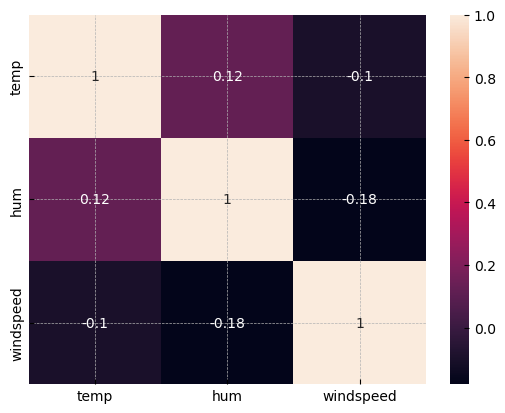

In [58]:
# Creating a list of numerical columns
nonCategorical = ['temp', 'hum', 'windspeed']

# Plotting heatmap for numerical features
sns.heatmap(X_train[nonCategorical].corr(), annot=True)
plt.show()

We can see that, there's not much correlation between individual features. But, there can be __multicollinearity__ between the features, which is a major issue.

So, now we'll check for multicollinearity using Variance Inflation Factor i.e. VIF.

In [59]:
# Importing required library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

We will now create a function for generating VIF table, as we might need it in future.

In [60]:
# Defining a function to generate VIF table

def vif_table(data):
    
    vif_table = pd.DataFrame()
    vif_table['Features'] = data.columns
    
    # Calculating VIF for all the features
    vif_table['VIF'] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))] 
    vif_table['VIF'] = round(vif_table['VIF'], 2)
    
    # Sorting and resetting index
    vif_table = vif_table.sort_values('VIF',ascending=False)
    vif_table.reset_index(drop=True, inplace=True)
    
    return vif_table

Now, let's check VIF for our top 15 features.

In [61]:
# Printing VIF table

vif_table(X_train)

,Features,VIF
0,hum,13.64
1,temp,11.97
2,windspeed,5.43
3,winter,2.87
4,spring,2.74
5,Mist_Cloudy,2.58
6,November,1.90
7,yr_2019,1.81
8,January,1.80
9,July,1.56


We can see in the above table that `VIF` for __hum (i.e. humidity)__ is very high. This means __hum__ is having multicollinearity. So, we'll drop this column and rebuild our model.
Before proceding, we will write a function to build and print the summary of the generated model. This will help us in repetitively building and testing models.

In [62]:
# Writing function to build a linear regression model using statsmodels

def build_LRModel(X_train, y_train):
    # Adding intercept to X_train
    X_train_sm = sm.add_constant(X_train)

    # Training a Linear Regression model
    lr_model = sm.OLS(y_train, X_train_sm).fit()
    
    # Printing model summary
    print(lr_model.summary())
    
    # Returning model object
    return lr_model

Now, we'll remove __hum__ column from predictors and build the model.

In [63]:
# Dropping "hum" column from X_train
X_train.drop('hum', axis=1, inplace=True)

# Building model
build_LRModel(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     180.5
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          3.74e-175
Time:                        23:59:13   Log-Likelihood:                 451.14
No. Observations:                 468   AIC:                            -872.3
Df Residuals:                     453   BIC:                            -810.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2692      0.027     

Also, let's check the VIF table for the above features.

In [64]:
# Printing VIF table

vif_table(X_train)

,Features,VIF
0,temp,5.69
1,windspeed,5.37
2,winter,2.64
3,spring,2.44
4,November,1.88
5,yr_2019,1.79
6,January,1.77
7,Mist_Cloudy,1.57
8,July,1.53
9,December,1.48


From the model's summary, there's no feature having high p-value. Let's check the VIF table.
We can see from the above table that __temp__ is having high VIF, along with __windspeed__. Let's drop __temp__ and rebuild the model.

In [65]:
# Building model without temp column as the feature

build_LRModel(X_train.loc[:, X_train.columns!='temp'], y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     136.5
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.38e-147
Time:                        23:59:17   Log-Likelihood:                 382.62
No. Observations:                 468   AIC:                            -737.2
Df Residuals:                     454   BIC:                            -679.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5604      0.017     

As soon we dropped __temp__, we can see there's a drastic change in the model's R_square value (i.e. it dropped from 84.8% to 79.6%). This suggests that, __temp__ might be a very significant column. Also, we have seen from our pairplot during analysis that __temp__ was having a good correlation with our target column.


Now, from the last VIF table, we can see that __windspeed__ was also having high VIF value. Let's try dropping that and see what happens.

In [66]:
# Dropping windspeed and rebuilding the model
X_train.drop('windspeed', axis=1, inplace=True)

# Rebuilding the model
build_LRModel(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     187.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          5.47e-173
Time:                        23:59:19   Log-Likelihood:                 443.23
No. Observations:                 468   AIC:                            -858.5
Df Residuals:                     454   BIC:                            -800.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2186      0.025     

We can see from the above summary that, after dropping __windspeed__ the model's R_Squared negligibly declines as compared to when we dropped the __temp__ column.

Now, let's check the VIF table for the current features.

In [67]:
# Printing VIF table

vif_table(X_train)

,Features,VIF
0,temp,3.14
1,winter,2.63
2,spring,2.13
3,November,1.82
4,yr_2019,1.78
5,January,1.76
6,Mist_Cloudy,1.54
7,July,1.49
8,December,1.46
9,May,1.23


From the model's summary, we can see that __p-value__ for "May" column is very high in comparison to other columns. Also, __May__ column's p-value is very near to 0.05 significance level. Hence, dropping this column should not have a huge impact on model's R_Square.

From the VIF table, we can see that the remaining feature don't have high multicollinearity.

We will now drop __May__ and rebuild our model.

In [68]:
# Dropping May and rebuilding the model
X_train.drop('May', axis=1, inplace=True)

# Rebuilding the model
build_LRModel(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.1
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          2.76e-173
Time:                        23:59:22   Log-Likelihood:                 441.17
No. Observations:                 468   AIC:                            -856.3
Df Residuals:                     455   BIC:                            -802.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2247      0.025     

So, we can see the __p-values__ of all the features is low, which means all the columns are significant.

Let's also check the drop in VIF for the remaining features.

In [69]:
# Checking VIF Table

vif_table(X_train)

,Features,VIF
0,temp,2.77
1,winter,2.57
2,spring,2.09
3,November,1.82
4,yr_2019,1.78
5,January,1.76
6,Mist_Cloudy,1.54
7,December,1.46
8,July,1.42
9,September,1.19


From the VIF table, we can see that we have reduced some multicollinearity.

Now, we're still left with 12 columns. Our model is still complex. Though, we can see that __p-values__ and __VIF__ for our model features are good.<br>
Hence, we will now drop the columns by looking at their __p-value and coefficient__.

So, we will drop __January__ as it has least coefficient and p-value. We will check the model's R_Square and see if it has significantly decreased or not. If it significantly decreases, then we will try another one.

In [70]:
# Dropping January and rebuilding the model
X_train.drop('January', axis=1, inplace=True)

# Rebuilding the model
build_LRModel(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     216.0
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          5.56e-173
Time:                        23:59:26   Log-Likelihood:                 437.65
No. Observations:                 468   AIC:                            -851.3
Df Residuals:                     456   BIC:                            -801.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2085      0.024     

We can see that our Adj. R_squared only dropped by 0.002, which wasn't a significant drop. Hence, we can proceed with __January__.

This time we will not check the VIF table, as we know it will decrease for sure.

Now, let's drop __September__, as it has the max p_value and also a low value of coefficient.

In [71]:
# Dropping January and rebuilding the model
X_train.drop('September', axis=1, inplace=True)

# Rebuilding the model
build_LRModel(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     232.5
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          3.33e-172
Time:                        23:59:27   Log-Likelihood:                 432.97
No. Observations:                 468   AIC:                            -843.9
Df Residuals:                     457   BIC:                            -798.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2041      0.024     

Again, there wasn't a significant drop in the model's adj. R_square, which is good. As our model is slowly becoming more simpler.

Let's now try dropping __December__ and see how it affects the model.

In [72]:
# Building model without December column

build_LRModel(X_train.loc[:, X_train.columns!='December'], y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     251.4
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          5.40e-171
Time:                        23:59:28   Log-Likelihood:                 427.24
No. Observations:                 468   AIC:                            -834.5
Df Residuals:                     458   BIC:                            -793.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1861      0.024     

This time it was a significant decrease from the first model, which had Adj. R_Squared of 0.837. Hence, we should keep __December__. We can try dropping __November__ instead.

In [73]:
# Building model without November column

build_LRModel(X_train.loc[:, X_train.columns!='November'], y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     245.5
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          4.87e-169
Time:                        23:59:30   Log-Likelihood:                 422.62
No. Observations:                 468   AIC:                            -825.2
Df Residuals:                     458   BIC:                            -783.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1780      0.024     

We can see that __November__ affects the model more. So, we should not drop __November__ as well.

We should stop dropping the columns here, as the coefficients of the remaining features are significant. Also, now our __model is simple__ enough to be used as the final model.

Now, we have left with 10 significant features for predicting our target. We will now finalize our model.

## Finalizing Model

We will now use all of the remaining 10 features to build our final model.

In [74]:
# Building the final model with 10 features and printing it's summary

bikeSharingFinalModel = build_LRModel(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     232.5
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          3.33e-172
Time:                        23:59:32   Log-Likelihood:                 432.97
No. Observations:                 468   AIC:                            -843.9
Df Residuals:                     457   BIC:                            -798.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2041      0.024     

__From our final model, we can observe the following :__
- <mark>It has __10__ highly significant features.</mark>
- __p-values__ of all the features are very low, which is good.
- It has a high value of R_squared and Adjusted R_square i.e. 
  - <mark>R_squared : __0.836__</mark> 
  - <mark>Adj. R_squared : __0.832__</mark><br>
  This tells us that our model is able to explain around __84%__ of the variance.
- __Prob (F-statistic)__ is very low, which tells us that our overall model is significant and not just by chance.<br>We can also see the __F-statistic__ is also high, which is good.

Hence, now our finalized our model. Now, we will perfrom __Residual Analysis__ on it.

# 6. RESIDUAL ANALYSIS

We will check if the residual assumptions made for a Linear Regression are valid for our final model. We'll check the following:

- Error terms are normally distributed with mean=0.
- Error terms are having constant variance i.e. error terms are __homescedastic__ in nature.
- Error terms have no relationship among them.

Let's find the residual.<br>
We know,

<mark>__Residual = Actual - Predicted__</mark>

So, we will use this formula to find out the residual terms.

In [75]:
# Adding intercept/constant to X_train
X_train_sm = sm.add_constant(X_train)

# Predicting using training set
y_train_pred = bikeSharingFinalModel.predict(X_train_sm)

# Determining residuals from the model built
residuals = y_train - y_train_pred

Now, we have calculated the residuals. To check whether the Error terms are normally distributed with mean 0, we will plot distribution plot for residuals.

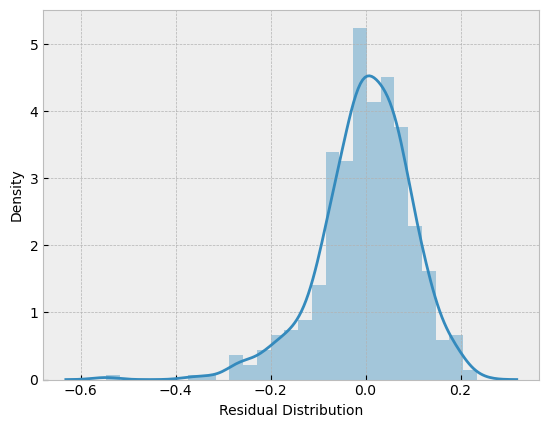

In [76]:
# Plotting distribution plot using seaborn

sns.distplot(x=residuals)
plt.xlabel("Residual Distribution")
plt.show()

From the above plot we can infer the following : 
1. <mark>Error terms are normally distributed.</mark>
2. <mark>Error terms have mean = 0</mark>

So, residuals are following the assumption of normal distribution. Now, let's check __homoscedasticity__ and the relationship using scatter plot.

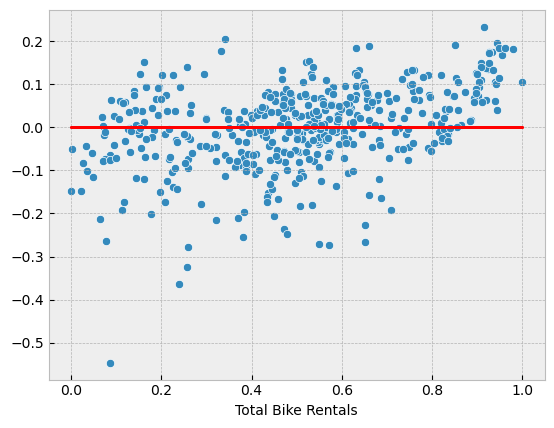

In [77]:
# Plotting scatterplot between residuals and the target column i.e. y_train

sns.scatterplot(x=y_train, y=residuals)
plt.plot(y_train, 0*y_train,'r')
plt.xlabel('Total Bike Rentals')
plt.show()

Here, we can see that __error terms are uniformly distributed along y=0__. This tells us the following:
1. <mark>Error terms (residuals) have constant variance i.e. error terms are __homoscedastic__ in nature.</mark>
2. <mark>Error terms have no relationship with no. of bike rentals i.e. error terms are __independent__ in nature.</mark>

__We have now validated all the residual assumptions for our Linear Regression model.__<br>We will now proceed with model evaluation.

# 7. MODEL EVALUATION

Here, we will evaluate our final model's performance with __unseen data__, i.e. Test Set.

We have 30% of records from the original dataset (i.e. __bikeSharingDaily__) in our test set, as we used 70% of the data to train our Linear Regression model.
Moreover, we scaled our training dataset using MinMaxScaler, hence we'll first transform our test dataset using the MinMaxScaler.

In [78]:
# Making a list of non-categorical columns
nonCategorical = ['temp', 'hum', 'windspeed','cnt']

# Transforming Test dataset using the fitted MinMaxScaler object
bikeSharingDaily_test[nonCategorical] = scaler.transform(bikeSharingDaily_test[nonCategorical])

In [79]:
# Validating the transformation on test set

bikeSharingDaily_test.sample(5)

,yr_2019,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow-Rain,Mist_Cloudy
168,0,0,0,0.794287,0.568097,0.273684,0.606861,0,1,0,...,0,0,1,0,0,0,0,0,0,0
592,1,0,1,0.822546,0.350418,0.336842,0.928673,0,0,0,...,0,0,0,0,0,0,0,0,0,0
623,1,0,0,0.649043,0.423553,0.191158,0.893463,0,0,0,...,0,1,1,0,0,0,0,0,0,0
354,0,0,1,0.460043,0.838612,0.561263,0.288544,1,0,0,...,0,0,0,0,0,0,0,0,0,1
303,0,0,1,0.350046,0.615462,0.237053,0.419159,0,0,1,...,1,0,0,0,0,0,0,1,0,0


Now, we will seperating the target and predictor columns.

In [80]:
# Seperating target and predictor columns

X_test = bikeSharingDaily_test.loc[:,bikeSharingDaily_test.columns!='cnt']
y_test = bikeSharingDaily_test['cnt']

We'll now keep only those feaures in the test predictors (X_test) which are significant for target prediction.

For this we'll use only those featurs (or columns) which are present in training predictors (X_train).

In [81]:
# Keeping only significant predictors in X_test

X_test = X_test.loc[:, X_train.columns]

Now, we will add intercept to predictors and use it to predict the target values.

In [82]:
# Adding intercept(constant) to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting using unseen data
y_test_pred = bikeSharingFinalModel.predict(X_test_sm)

We have now calculated the __total no. of bike rentals__ based on the unseen predictors.

Let's now evaluate the model using `R_Squared`.

In [83]:
# Importing r2_score
from sklearn.metrics import r2_score

# Evaluating the model against unseen data
r2 = r2_score(y_test, y_test_pred)
r2

0.8133862303836012

### Model's r2_score = `0.8133`

In [84]:
# Printing in percentage format

print(round(r2*100,2),'%')

81.34 %


### Model Accuracy : `81.34%`

We can see that our model performed very well even with unseen data, which tells us that we have created a very good model for predicting the total number of bike shares.

Now, let's plot a scatter plot to visualize the spread between actual and predicted.

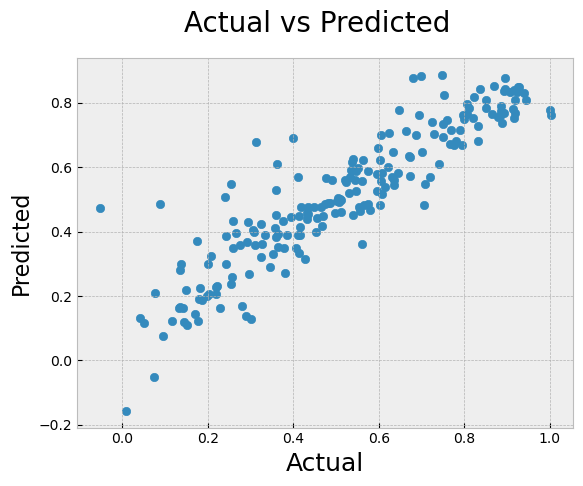

In [85]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('Actual vs Predicted', fontsize = 20)          # Plot heading 
plt.xlabel('Actual', fontsize = 18)                          # X-label
plt.ylabel('Predicted', fontsize = 16)   
plt.show()

As we can see from the above plot that there's <mark>__strong linear relationship between the Actual and Predicted values.__</mark>  With this we can conclude that our model is decent enough for prediction of __number of bike rentals.__

# SUMMARY

__We have built a Linear Regression model to predict the demand of shared bikes in the American Market. The linear equation for the same is given by :__

<span style="color:'red">$ cnt = 0.2041 + 0.2556  \times  yr\_2019 - 0.1028  \times  holiday + 0.4736 \times temp - 0.1359 \times spring + 0.1060 \times winter - 0.0626 \times December - 0.0898 \times July - 0.0926 \times November - 0.3178 \times Light\_Snow-Rain - 0.0857 \times Mist\_Cloudy$</span>

Here,<br>
`cnt` is the demand of shared bikes on a particular day i.e. our target variable.

We can see in the above equation : 
1. __yr_2019__ is positively affecting demands i.e. Demands in 2019 has grown as compared to 2018.
2. __holiday__ is negatively impacting demands i.e. on holidays demands will be relatively less.
3. __temp__ is positively impacting demands i.e. increase in temperature, increases the demand.
4. __spring__ is negatively impacting demands i.e. during spring season demand is decreasing.
5. __winter__ is positively impacting demands i.e. during winter season demand is expected to be higher.
6. __December, July and November__ are negatively impacting demands i.e. during these months demand is lower.
7. __Light_Snow-Rain and Mist_Cloudy__ type weather is negatively impacting demands i.e. during snowy, rainy and misty weather demand is expected to decrease.

Out of all these features, <mark>__temp (temperature)__ is the most important factor affecting the demands of shared bikes in the American Market.</mark>

- We can see, that __Winter__ is positively affecting demands whereas the months of __November, December and January__ are negatively affecting the demands. This is due to the fact that USA has around 50 states and that's why __Winter__ can be during the months other December-January.
- __Temperature__ is positively affecting the demands because in USA , during winters it's mostly holiday and during summers it's not the case which is why demand is more.
- During __Light Snowy or Rainy__ weather cars are usually preferred as people would not like to go unprotected.
- During __holidays__, demand for shared bikes is low as people will stay at home during these days.

## :: Linear Regression Model's Peformance ::
__R_Squared:__`0.836`<br>
__Adj. R_Squared:__`0.832`<br>
__Model's R2_Score:__`0.813`